In [ ]:
# Checkout www.pygimli.org for more examples


# The DataContainer class
Data are often organized in a data container storing the individual data values
as well as any description how they were obtained, e.g. the geometry of source
and receivers.

So first a data container holds vectors like in a dictionary, however, all of
them need to have the same length defined by the .size() method.
Assume we want to store Vertical Electrical Sounding (VES) data.


In [1]:
# We start off with the typical imports
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import VESManager

We define logarithmically equidistant AB/2 spacings




In [2]:
ab2 = np.logspace(0, 3, 11)
print(ab2)

[   1.            1.99526231    3.98107171    7.94328235   15.84893192
   31.6227766    63.09573445  125.89254118  251.18864315  501.18723363
 1000.        ]


We create an empty data container



In [3]:
ves = pg.DataContainer()
print(ves)

Data: Sensors: 0 data: 0, nonzero entries: []


We feed it into the data container just like in a dictionary.




In [4]:
ves["ab2"] = ab2
ves["mn2"] = ab2 / 3
print(ves)

Data: Sensors: 0 data: 11, nonzero entries: ['ab2', 'mn2']


We now want to do a VES simulation and use the VES Manager for this task.




In [5]:
mgr = VESManager()
model = [10, 10, 100, 10, 1000]
ves["rhoa"] = mgr.simulate(model, ab2=ves["ab2"], mn2=ves["mn2"])
print(ves)

Data: Sensors: 0 data: 11, nonzero entries: ['ab2', 'mn2', 'rhoa']


We can plot the sounding curve by assessing its fields




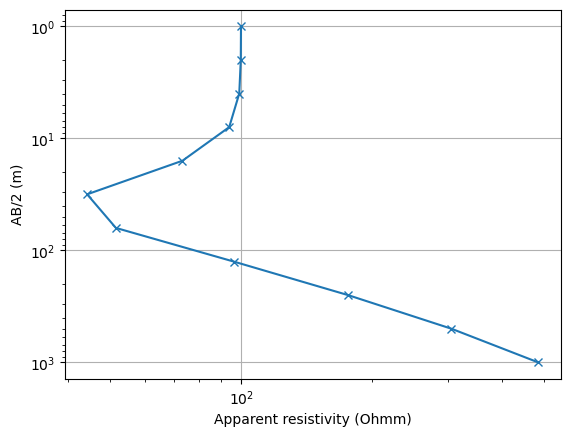

In [6]:
fig, ax = plt.subplots()
ax.loglog(ves["rhoa"], ves["ab2"], "x-");
ax.set_ylim(ax.get_ylim()[::-1])
ax.grid(True)
ax.set_xlabel("Apparent resistivity (Ohmm)")
ax.set_ylabel("AB/2 (m)");

A data container can be saved to disk




In [7]:
ves.save("ves.data")
print(open("ves.data").read())

0
# x y z
11
# ab2 mn2 rhoa valid 
1.00000000000000e+00	3.33333333333333e-01	9.99842595368026e+01	0
1.99526231496888e+00	6.65087438322960e-01	9.98766666391267e+01	0
3.98107170553497e+00	1.32702390184499e+00	9.90710153790337e+01	0
7.94328234724281e+00	2.64776078241427e+00	9.39205974843448e+01	0
1.58489319246111e+01	5.28297730820371e+00	7.33018913900196e+01	0
3.16227766016838e+01	1.05409255338946e+01	4.41998154306538e+01	0
6.30957344480193e+01	2.10319114826731e+01	5.14873009414442e+01	0
1.25892541179417e+02	4.19641803931389e+01	9.61269991281244e+01	0
2.51188643150958e+02	8.37295477169860e+01	1.76491691336385e+02	0
5.01187233627272e+02	1.67062411209091e+02	3.05345771380821e+02	0
1.00000000000000e+03	3.33333333333333e+02	4.83494826609041e+02	0
0



The data are (along with a valid flat) in the second section.
We can add arbitrary entries to the data container but define what to save.




In [8]:
ves["flag"] = pg.Vector(ves["rhoa"] > 100) + 1
print(ves)
ves.save("ves.data", "ab2 mn2 rhoa")
print(open("ves.data").read())

Data: Sensors: 0 data: 11, nonzero entries: ['ab2', 'flag', 'mn2', 'rhoa']
0
# x y z
0
# ab2 mn2 rhoa
0



We can mask or unmask the data with a boolean vector.



In [9]:
ves.markValid(ves["ab2"] > 2)
ves.save("ves.data", "ab2 rhoa")  # note that only valid data are saved!
print(ves)

Data: Sensors: 0 data: 11, nonzero entries: ['ab2', 'flag', 'mn2', 'rhoa', 'valid']


## Data containers with indexed data

Assume we have data associate with a transmitter, receivers and a property U.
The transmitter (Tx) and receiver (Rx) positions are stored separately and we
refer them with an Index (integer). Therefore we define these fields index.




In [10]:
data = pg.DataContainer()
data.registerSensorIndex("Tx")
data.registerSensorIndex("Rx")
print(data)

Data: Sensors: 0 data: 0, nonzero entries: ['Rx', 'Tx']


Create a list of 10 sensors, 2m spacing




In [11]:
for x in np.arange(10):
    data.createSensor([x*2, 0])

print(data)

Data: Sensors: 10 data: 0, nonzero entries: ['Rx', 'Tx']


We want to use all of them (and two more!) as receivers and a constant
transmitter of number 2.




In [12]:
data["Rx"] = np.arange(12)
# data["Tx"] = np.arange(9) # does not work as size matters!
data["Tx"] = pg.Vector(data.size(), 2)
print(data)
data.save("TxRx.data")
print(open("TxRx.data").read())

Data: Sensors: 10 data: 12, nonzero entries: ['Rx', 'Tx']
10
# x y z
0	0	0
2	0	0
4	0	0
6	0	0
8	0	0
10	0	0
12	0	0
14	0	0
16	0	0
18	0	0
12
# Rx Tx valid 
1	3	0
2	3	0
3	3	0
4	3	0
5	3	0
6	3	0
7	3	0
8	3	0
9	3	0
10	3	0
11	3	0
12	3	0
0



Again, we can mark the data validity.




In [13]:
data.markValid(data["Rx"] >= 0)
print(data["valid"])
print(data["Rx"])

12 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


or check the data validity automatically.




In [14]:
data.checkDataValidity()
print(data["valid"])
data.removeInvalid()
print(data)
# data.save("TxRx.data");

10 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Data: Sensors: 10 data: 10, nonzero entries: ['Rx', 'Tx', 'valid']


Suppose we want to compute the horizontal offset between Tx and Rx.
We first retrieve the x position and use Tx and Rx as indices.




In [15]:
sx = pg.x(data)
data["dist"] = np.abs(sx[data["Rx"]] - sx[data["Tx"]])
print(data["dist"])

10 [4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0]


It might be useful to only use data where transmitter is not receiver.




In [16]:
data.markInvalid(data["Rx"] == data["Tx"])
print(data)
# data.save("TxRx.data");

Data: Sensors: 10 data: 10, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


They are still there but can be removed.




In [17]:
data.removeInvalid()
print(data)

Data: Sensors: 10 data: 9, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


At any stage we can create a new sensor




In [18]:
data.createSensor(data.sensors()[-1])
print(data)  # no change

Data: Sensors: 10 data: 9, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


, however, not at a position where already a sensor is




In [19]:
data.createSensor(data.sensors()[-1]+0.1)
print(data)
# data.save("TxRx.data")

Data: Sensors: 11 data: 9, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


Any DataContainer (indexed or not) can be visualized as matrix plot




19/03/24 - 14:29:41 - pyGIMLi - INFO - found 9 x values
19/03/24 - 14:29:41 - pyGIMLi - INFO - found 1 y values
19/03/24 - 14:29:41 - pyGIMLi - INFO - x vector length: 9
19/03/24 - 14:29:41 - pyGIMLi - INFO - y vector length: 9
19/03/24 - 14:29:41 - pyGIMLi - INFO - v vector length: 9


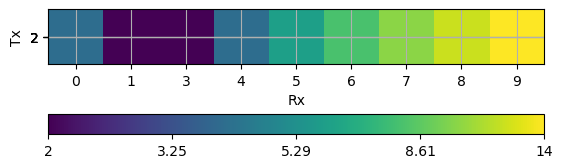

In [20]:
pg.viewer.mpl.showDataContainerAsMatrix(data, "Rx", "Tx", "dist");

Instead of marking and filtering one can remove directly




In [21]:
print(data["dist"])
data.remove(data["dist"] > 11)
print(data["dist"])
print(data)

9 [4.0, 2.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0]
7 [4.0, 2.0, 2.0, 4.0, 6.0, 8.0, 10.0]
Data: Sensors: 11 data: 7, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


Similar to the nodes of a mesh, the sensor positions can be changed.




In [22]:
data.scale([2, 1])
data.translate([10, 0])
data.save("TxRx.data")

1

Suppose a receiver has not been used




In [23]:
data["Rx"][5] = data["Rx"][4]
data.removeUnusedSensors()
print(data)

Data: Sensors: 8 data: 7, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


or any measurement with it (as Rx or Tx) is corrupted




In [ ]:
data.removeSensorIdx(2)
print(data)

There are specialized data containers with predefined indices like
pg.DataContainerERT having indices for a, b, m and b electrodes.
One can also add alias translators like C1, C2, P1, P2, so that
dataERT["P1"] will return dataERT["m"]


